<a href="https://colab.research.google.com/github/Ihalagedara/FYP2-IDS/blob/colab/new_anormal_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras-tuner

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
#import kerastuner as kt

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/FYP IDS SDN/FYP ML/InSDN_DatasetCSV/new_dataset.csv', sep=",")

In [ ]:
#condition3 = data['Label'] != 'Probe'
condition4 = data['Label'] != 'Normal'
data = data.drop(data[condition4].index)

In [ ]:
#data['Label'] = data['Label'].replace('Probe', 1)
data['Label'] = data['Label'].replace('Normal', 0)

In [ ]:
data = data.drop(['Flow ID','Src IP','Src Port','Dst IP', 'Dst Port', 'Timestamp'], axis=1)


In [ ]:
data, data_test = train_test_split(data, test_size=0.2)

In [ ]:
y_data = data["Label"]
data = data.drop(["Label"],axis=1)
y_data_test = data_test["Label"]
data_test = data_test.drop(["Label"],axis=1)

In [ ]:
selected_features = ['Protocol', 'Tot Fwd Pkts', 'Flow Pkts/s', 'Fwd Header Len', 'Bwd Header Len', 'Bwd Pkts/s', 'Pkt Len Max', 'Init Bwd Win Byts']
data = data.drop(columns=data.columns.difference(selected_features))
data_test = data_test.drop(columns=data_test.columns.difference(selected_features))

In [ ]:
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)

normalized_data = (data - mean) / std_dev

In [ ]:
data_test.head(1)

,Protocol,Tot Fwd Pkts,Flow Pkts/s,Fwd Header Len,Bwd Header Len,Bwd Pkts/s,Pkt Len Max
181829,17,1,876.232202,8,24,657.174151,345


In [ ]:
msle = MeanSquaredLogarithmicError()

In [ ]:
def build_model(hp):
  model = tf.keras.Sequential()

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units1 = hp.Int('units1', min_value=32, max_value=1024, step=32)
  hp_units2 = hp.Int('units2', min_value=32, max_value=1024, step=32)
  hp_units3 = hp.Int('units3', min_value=32, max_value=1024, step=32)
  hp_units4 = hp.Int('units4', min_value=32, max_value=1024, step=32)
  hp_units5 = hp.Int('units5', min_value=32, max_value=1024, step=32)
  hp_units6 = hp.Int('units6', min_value=32, max_value=1024, step=32)
  hp_units7 = hp.Int('units7', min_value=32, max_value=1024, step=32)
  hp_units8 = hp.Int('units8', min_value=32, max_value=1024, step=32)
  hp_units9 = hp.Int('units9', min_value=32, max_value=1024, step=32)
  model.add(Dense(units=hp_units1, input_shape=(7,), activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp_units2, activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp_units3, activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp_units4, activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp_units5, activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp_units6, activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp_units7, activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp_units8, activation='relu'))

  model.add(tf.keras.layers.Dense(units=2, activation='relu'))

  model.add(tf.keras.layers.Dense(units=hp_units8, activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp_units7, activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp_units6, activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp_units5, activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp_units4, activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp_units3, activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp_units2, activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp_units1, activation='relu'))
  model.add(Dense(7, activation='linear'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
      loss='mse',
      metrics=["accuracy"]
  )
  return model

In [ ]:
tuner1 = kt.Hyperband(
    build_model,
    objective=['accuracy', 'val_loss'],
    max_epochs=20,
    directory='keras_tuner_dir',
    factor=10,
    project_name='keras_tuner_demo'
)

In [ ]:
tuner1.search(normalized_data, normalized_data, epochs=20,batch_size = 68 ,validation_split=0.2)

Trial 20 Complete [00h 02m 03s]
multi_objective: 0.5873285830020905

Best multi_objective So Far: -0.7292707245796919
Total elapsed time: 00h 16m 29s


In [ ]:
for h_param in [f"units{i}" for i in range(1,9)] + ['learning_rate']:
  print(h_param, tuner1.get_best_hyperparameters()[0].get(h_param))

units1 256
units2 384
units3 608
units4 704
units5 672
units6 224
units7 704
units8 768
units9 480
learning_rate 0.0001


In [ ]:
model = keras.Sequential([
    Dense(units=256, input_shape=(7,), activation='relu'),
    Dense(units=384, activation='relu'),
    Dense(units=608, activation='relu'),
    Dense(units=704, activation='relu'),

    Dense(units=672, activation='relu'),
    Dense(units=224, activation='relu'),
    Dense(units=704, activation='relu'),

    Dense(units=768, activation='relu'),
    Dense(units=400, activation='relu'),

    Dense(units=2, activation='relu'),

    Dense(units=400, activation='relu'),
    Dense(units=768, activation='relu'),
    Dense(units=704, activation='relu'),
    Dense(units=224, activation='relu'),
    Dense(units=672, activation='relu'),

    Dense(units=704, activation='relu'),
    Dense(units=608, activation='relu'),

    Dense(units=384, activation='relu'),
    Dense(units=256, activation='relu'),

    Dense(units=7, activation='linear')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='mse',metrics=["accuracy"])

In [ ]:
model.summary()

In [ ]:
dl = model.fit(data, data, epochs=50, batch_size=68,validation_split=0.2)

In [ ]:
#dl = best_model = tuner1.get_best_models(num_models=1)[0]

In [ ]:
print(f"max accuracy {max(dl.history['accuracy'])} : index {dl.history['accuracy'].index(max(dl.history['accuracy']))}")
print(f"max val accuracy {max(dl.history['val_accuracy'])} : index {dl.history['val_accuracy'].index(max(dl.history['val_accuracy']))}")
print(f"min loss {min(dl.history['loss'])} : index {dl.history['loss'].index(min(dl.history['loss']))}")
print(f"min val loss {min(dl.history['val_loss'])} : index {dl.history['val_loss'].index(min(dl.history['val_loss']))}")

max accuracy 0.9063506126403809 : index 45
max val accuracy 0.9061928987503052 : index 40
min loss 5503907.5 : index 44
min val loss 1814578.375 : index 40


In [ ]:
from matplotlib import pyplot as plt


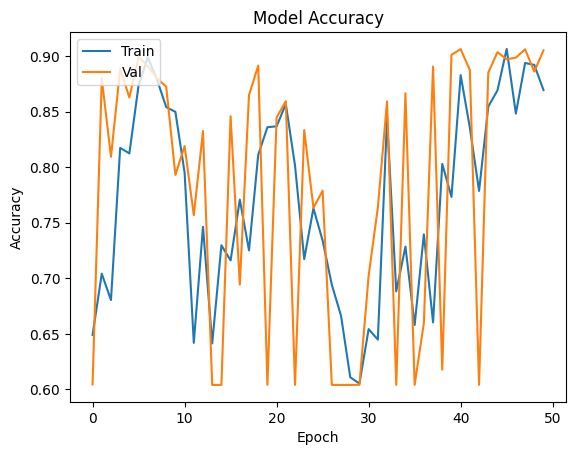

In [ ]:
plt.plot(dl.history['accuracy'])
plt.plot(dl.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

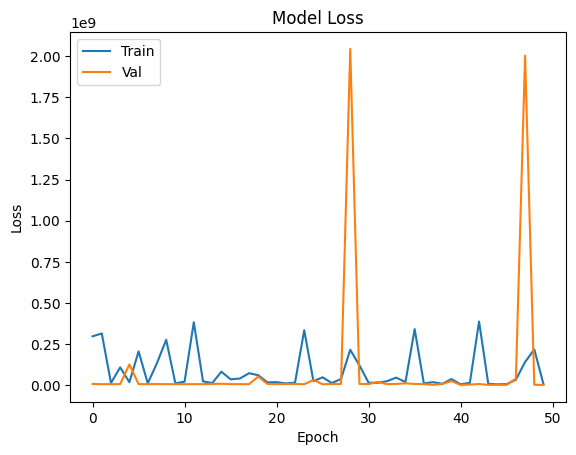

In [ ]:
plt.plot(dl.history['loss'])
plt.plot(dl.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
mean = np.mean(data_test, axis=0)
std_dev = np.std(data_test, axis=0)

norm_data = (data_test - mean) / std_dev

In [ ]:
data_test = np.array(data_test)

In [ ]:
data_test[0]

array([1.70000000e+01, 1.00000000e+00, 1.18729593e+03, 8.00000000e+00,
       2.40000000e+01, 8.90471950e+02, 3.96000000e+02])

In [ ]:
reconstructions = model.predict(np.array(data_test))

In [ ]:
reconstructions

array([[ 1.69280851e+00,  2.12574124e-01,  1.30327942e+03, ...,
        -2.01184392e+00,  6.54343933e+02,  9.93472672e+00],
       [-1.57644045e+00,  1.92155724e+01, -5.96943808e+00, ...,
         1.02539563e+03,  1.48899040e+01,  1.66556873e+03],
       [ 2.56742144e+00,  1.08213675e+00,  1.02538795e+01, ...,
         7.54897156e+01,  9.39838886e+00,  1.38912476e+02],
       ...,
       [ 1.79611814e+00,  6.65475130e-02,  2.00558350e+03, ...,
        -2.35068059e+00,  1.00554974e+03,  1.02661629e+01],
       [ 1.54294813e+00,  4.11701322e-01,  2.65038757e+02, ...,
        -1.33186650e+00,  1.35000351e+02,  9.18127632e+00],
       [ 1.68919599e+00,  2.17701077e-01,  1.27860938e+03, ...,
        -2.00000310e+00,  6.42007019e+02,  9.92314529e+00]], dtype=float32)

In [ ]:
mse = np.mean(np.square(data_test - reconstructions), axis=1)
threshold = np.percentile(mse, 95)

is_anomaly = mse < threshold

In [ ]:
mse

In [ ]:
threshold

In [ ]:
is_anomaly

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
an = []
for i in range(len(is_anomaly)):
  if is_anomaly[i]:
    an.append(0)
  else:
    an.append(1)

In [ ]:
an =np.array(an)

y_data_test = np.array(y_data_test)

In [ ]:
count =0
for i in range(len(an)):
  if an[i] == y_data_test[i]:
    count = count +1

count/len(an)

0.9499451954694922

In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/FYP IDS SDN/FYP ML/InSDN_DatasetCSV/new_dataset.csv', sep=",")
data['Label'].unique()

array(['BFA', 'DDoS ', 'DoS', 'Probe', 'Web-Attack', 'BOTNET', 'Normal',
       'U2R', 'DDoS'], dtype=object)

In [ ]:
data = data.drop(['Flow ID','Src IP','Src Port','Dst IP', 'Dst Port', 'Timestamp'], axis=1)
selected_features = ['Protocol', 'Tot Fwd Pkts', 'Flow Pkts/s', 'Fwd Header Len', 'Bwd Header Len', 'Bwd Pkts/s', 'Pkt Len Max', 'Init Bwd Win Byts','Label']
data = data.drop(columns=data.columns.difference(selected_features))
condition4 = data['Label'] != 'BFA'
data = data.drop(data[condition4].index)
data['Label'] = data['Label'].replace('BFA', 1)

In [ ]:
y_data = data["Label"]
data = data.drop(["Label"],axis=1)

In [ ]:
reconstructions = model.predict(np.array(data))

44/44 [==============================] - 0s 5ms/step


In [ ]:
mse = np.mean(np.square(data - reconstructions), axis=1)
threshold = np.percentile(mse, 95)

is_anomaly = mse < threshold

In [ ]:
is_anomaly[1]

True

In [ ]:
an = []
for i in range(len(is_anomaly)):
  if is_anomaly[i]:
    an.append(0)
  else:
    an.append(1)

KeyError: ignored

In [ ]:




an = []
for i in range(len(is_anomaly)):
  if is_anomaly[i]:
    an.append(0)
  else:
    an.append(1)

an =np.array(an)

y_data_test = np.array(y_data)

count =0
for i in range(len(an)):
  if an[i] == y_data_test[i]:
    count = count +1

count/len(an)

44/44 [==============================] - 0s 2ms/step


KeyError: ignored

In [ ]:
data = data.drop(['Flow ID','Src IP','Src Port','Dst IP', 'Dst Port', 'Timestamp'], axis=1)

In [ ]:
selected_features = ['Protocol', 'Tot Fwd Pkts', 'Flow Pkts/s', 'Fwd Header Len', 'Bwd Header Len', 'Bwd Pkts/s', 'Pkt Len Max', 'Init Bwd Win Byts','Label']
data = data.drop(columns=data.columns.difference(selected_features))

In [ ]:
data.head()

,Protocol,Tot Fwd Pkts,Flow Pkts/s,Fwd Header Len,Bwd Header Len,Bwd Pkts/s,Pkt Len Max,Label
0,6,2,1730.531520,64,176,1236.093943,1803,BFA
1,6,1,7042.253521,32,32,3521.126761,0,BFA
2,6,2,1627.150163,64,176,1162.250116,1803,BFA
3,6,1,24096.385540,32,32,12048.192770,0,BFA
4,6,2,1861.702128,64,176,1329.787234,1803,BFA


In [ ]:
normal = data[]

In [ ]:
normal

138722    Normal
138723    Normal
138724    Normal
138725    Normal
138726    Normal
           ...  
207141    Normal
207142    Normal
207143    Normal
207144    Normal
207145    Normal
Name: Label, Length: 68424, dtype: object

In [ ]:
data['Label'][data['Label']!='Normal'] = 1

<ipython-input-29-127e7c78a13e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label'][data['Label']!='Normal'] = 1


In [ ]:
data['Label'][data['Label']=='Normal'] = 0

<ipython-input-30-0d0b528d951f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label'][data['Label']=='Normal'] = 0


In [ ]:
y_data = data["Label"]
data = data.drop(["Label"],axis=1)

In [ ]:
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)

norm_data = (data - mean) / std_dev

In [ ]:
y_data.unique()

array([1, 0], dtype=object)

In [ ]:
data = np.array(norm_data)

In [ ]:
data[0]

array([ 0.21351397, -0.00267689, -0.43423177, -0.00905017,  0.02298864,
       -0.4328682 ,  0.45967599])

In [ ]:
reconstructions = model.predict(data)

10747/10747 [==============================] - 26s 2ms/step


In [ ]:
mse = np.mean(np.square(data - reconstructions*3), axis=1)

In [ ]:
threshold = np.percentile(mse/1000, 95)

is_anomaly = mse > threshold

In [ ]:
reconstructions

array([[ 1.006152  , -0.08455173, -0.07474982, ..., -0.06969851,
        -0.07283197, -0.2656007 ],
       [ 1.0092292 , -0.08980396,  0.17264217, ..., -0.07095439,
         0.17162453, -0.26039374],
       [ 1.0061547 , -0.08455723, -0.07475293, ..., -0.06969683,
        -0.07283293, -0.2655812 ],
       ...,
       [ 1.0091529 , -0.08972427,  0.16814253, ..., -0.07094335,
         0.16703463, -0.2605102 ],
       [ 1.0090334 , -0.08957318,  0.16084354, ..., -0.07091149,
         0.15964374, -0.26069233],
       [ 1.0090545 , -0.08959994,  0.16213557, ..., -0.07091709,
         0.16095208, -0.2606601 ]], dtype=float32)

In [ ]:
mse

array([1.38672005, 1.4618267 , 1.38672507, ..., 1.47591388, 1.45257038,
       1.46811843])

In [ ]:
is_anomaly[is_anomaly != 'False'] = 0

<ipython-input-45-2f45274dd573>:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  is_anomaly[is_anomaly != 'False'] = 0


In [ ]:
is_anomaly[is_anomaly == 'False'] = 1

<ipython-input-46-41ce8964219f>:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  is_anomaly[is_anomaly == 'False'] = 1


In [ ]:
an = []
for i in range(len(is_anomaly)):
  if is_anomaly[i]:
    an.append(0)
  else:
    an.append(1)

In [ ]:
an =np.array(an)

In [ ]:
y_data = np.array(y_data)

In [ ]:
an

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y_data

array([1, 1, 1, ..., 1, 1, 1], dtype=object)

In [ ]:
mse1 = np.mean(np.square(y_data - an))

In [ ]:
mse1

0.19897117965389996

In [ ]:
count =0
for i in range(len(an)):
  if an[i] == y_data[i]:
    count = count +1

count/len(an)

0.8010288203461

In [ ]:
plt.plot(is_anomaly)